# Tải các thư viện cần dùng

In [83]:
%pip install scikit-learn pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [84]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits  # Import thư viện tải dữ liệu
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.metrics import accuracy_score, recall_score

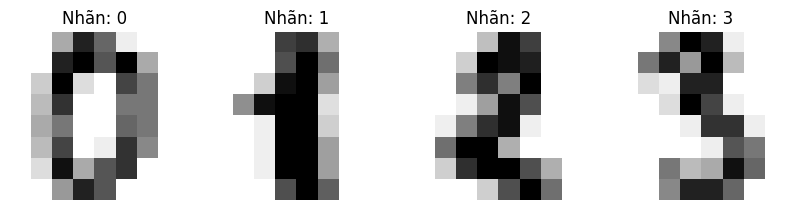

In [85]:
# Tải dữ liệu Digits
digits = load_digits()

# Lấy 4 ảnh đầu tiên và nhãn của nó để xem thử
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Nhãn: {label}")

plt.show()

# Chia dữ liệu

In [86]:
# Ý tưởng: Ta sẽ cắt tập dự liệu 2 lần, lần 1 cắt lấy 60% để train, 
#          còn lại 40% sẽ cắt đôi ra ở lần 2 để kiểm thử và kiểm tra

X = digits.data   # Dữ liệu (đề bài)
y = digits.target # Nhãn (đáp án)

# lần 1
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# lần 2
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# check
print(f"- Tập Train: {X_train.shape[0]} ảnh")
print(f"- Tập Val: {X_val.shape[0]} ảnh")
print(f"- Tập Test: {X_test.shape[0]} ảnh")

- Tập Train: 1078 ảnh
- Tập Val: 359 ảnh
- Tập Test: 360 ảnh


# Chuẩn hoá dữ liệu

In [87]:
# Ý tưởng: Đưa dữ liệu về tập có giá trị trung bình là 0, độ lệch chuẩn là 1 
#          và các giá trị sẽ trong khoảng (-2, 2) thay vì (0, 16)

# dùng kỹ thuật StandardScaler 
scaler = StandardScaler()

# chuẩn hoá và áp dụng lên tập Train
X_train_scaled = scaler.fit_transform(X_train)

# 2. áp dụng và Val và Test, không fit
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# check
print("pixel đầu tiên cũ", X_train[0][0])
print("pixel đầu tiên mới", X_train_scaled[0][0]) # thường sẽ loanh quanh 0

print("\npixel bất kỳ", X_train[0][30])
print("pixel đó sau khi chuẩn hoá", X_train_scaled[0][30])

pixel đầu tiên cũ 0.0
pixel đầu tiên mới 0.0

pixel bất kỳ 6.0
pixel đó sau khi chuẩn hoá 1.0143083797184471


# Huấn luyện và tối ưu tham số

### Hồi quy Logistic

In [88]:
# list giá trị C muốn thử nghiệm
C_test = [0.001, 0.01, 0.1, 1, 10, 100]
best_acc = 0
best_C = None
best_log_reg_model = None
print("Hồi quy Logistic")
for c in C_test:
    model = LogisticRegression(C=c, random_state=42, max_iter=1000) # khởi tạo model
    model.fit(X_train_scaled, y_train) # train model
    val_acc = model.score(X_val_scaled, y_val) # accuracy trên tập VAL
    print(f" - Với C = {c}, độ chính xác trên Val: {val_acc:.4f}")
    if val_acc > best_acc:
        best_acc = val_acc
        best_C = c
        best_log_reg_model = model # save best model
print(f"==> Tham số tốt nhất là C = {best_C} với độ chính xác Val = {best_acc:.4f}")

Hồi quy Logistic
 - Với C = 0.001, độ chính xác trên Val: 0.9164
 - Với C = 0.01, độ chính xác trên Val: 0.9415
 - Với C = 0.1, độ chính xác trên Val: 0.9554
 - Với C = 1, độ chính xác trên Val: 0.9610
 - Với C = 10, độ chính xác trên Val: 0.9610
 - Với C = 100, độ chính xác trên Val: 0.9554
==> Tham số tốt nhất là C = 1 với độ chính xác Val = 0.9610


### Decision tree

In [89]:
# Thử các độ sâu từ 1 đến 20
depth_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
best_dt_acc = 0
best_depth = None
best_tree_model = None
print("Decision Tree")
for depth in depth_test:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42) # khởi tạo model
    model.fit(X_train_scaled, y_train) # train model
    val_acc = model.score(X_val_scaled, y_val) # accuracy trên tập VAL
    print(f" - Với max_depth = {depth}, độ chính xác trên Val: {val_acc:.4f}")
    if val_acc > best_dt_acc:
        best_dt_acc = val_acc
        best_depth = depth
        best_tree_model = model # save best model
print(f"==> Độ sâu tốt nhất là {best_depth} với độ chính xác Val = {best_dt_acc:.4f}")

Decision Tree
 - Với max_depth = 1, độ chính xác trên Val: 0.1811
 - Với max_depth = 2, độ chính xác trên Val: 0.3287
 - Với max_depth = 3, độ chính xác trên Val: 0.5348
 - Với max_depth = 4, độ chính xác trên Val: 0.6212
 - Với max_depth = 5, độ chính xác trên Val: 0.7187
 - Với max_depth = 6, độ chính xác trên Val: 0.8189
 - Với max_depth = 7, độ chính xác trên Val: 0.8357
 - Với max_depth = 8, độ chính xác trên Val: 0.8412
 - Với max_depth = 9, độ chính xác trên Val: 0.8329
 - Với max_depth = 10, độ chính xác trên Val: 0.8329
 - Với max_depth = 15, độ chính xác trên Val: 0.8412
 - Với max_depth = 20, độ chính xác trên Val: 0.8412
==> Độ sâu tốt nhất là 8 với độ chính xác Val = 0.8412


### KNN

In [90]:
k_test = [1, 3, 5, 7, 9, 11, 13, 15]
best_knn_acc = 0
best_k = None
best_knn_model = None
print("KNN")
for k in k_test:
    model = KNeighborsClassifier(n_neighbors=k) # khởi tạo model
    model.fit(X_train_scaled, y_train) # train model
    val_acc = model.score(X_val_scaled, y_val) # accuracy trên tập VAL
    print(f" - Với K = {k}, độ chính xác trên Val: {val_acc:.4f}")
    if val_acc > best_knn_acc:
        best_knn_acc = val_acc
        best_k = k
        best_knn_model = model # save best model
print(f"==> Số hàng xóm tốt nhất là K = {best_k} với độ chính xác Val = {best_knn_acc:.4f}")

KNN
 - Với K = 1, độ chính xác trên Val: 0.9638
 - Với K = 3, độ chính xác trên Val: 0.9721
 - Với K = 5, độ chính xác trên Val: 0.9721
 - Với K = 7, độ chính xác trên Val: 0.9721
 - Với K = 9, độ chính xác trên Val: 0.9721
 - Với K = 11, độ chính xác trên Val: 0.9749
 - Với K = 13, độ chính xác trên Val: 0.9582
 - Với K = 15, độ chính xác trên Val: 0.9499
==> Số hàng xóm tốt nhất là K = 11 với độ chính xác Val = 0.9749


### Mạng nơron nhân tạo

In [91]:
warnings.filterwarnings('ignore') 

# test các cấu trúc mạng khác nhau
# (100,) -> 1 lớp ẩn 100 nơ-ron
# (50, 50) -> 2 lớp ẩn, mỗi lớp 50 nơ-ron
# (100, 50) -> 2 lớp ẩn, to dần nhỏ
configs = [
    (50,), 
    (100,), 
    (50, 50), 
    (100, 50),
    (100, 100)
]
best_ann_acc = 0
best_config = None
best_ann_model = None
print("Mạng nơron nhân tạo")
for config in configs:
    model = MLPClassifier(hidden_layer_sizes=config, activation='relu', solver='adam', alpha=0.0001, max_iter=2000, random_state=42) # khởi tạo model
    model.fit(X_train_scaled, y_train) # train model
    val_acc = model.score(X_val_scaled, y_val) # accuracy trên tập VAL
    
    print(f" - Với cấu trúc {config}, độ chính xác trên Val: {val_acc:.4f}")

    if val_acc > best_ann_acc:
        best_ann_acc = val_acc
        best_config = config
        best_ann_model = model # save best model

print(f"==> Cấu trúc tốt nhất là {best_config} với độ chính xác Val = {best_ann_acc:.4f}")

Mạng nơron nhân tạo


 - Với cấu trúc (50,), độ chính xác trên Val: 0.9721
 - Với cấu trúc (100,), độ chính xác trên Val: 0.9749
 - Với cấu trúc (50, 50), độ chính xác trên Val: 0.9582
 - Với cấu trúc (100, 50), độ chính xác trên Val: 0.9749
 - Với cấu trúc (100, 100), độ chính xác trên Val: 0.9721
==> Cấu trúc tốt nhất là (100,) với độ chính xác Val = 0.9749


# Đánh giá trên tập Test

In [92]:
# lưu các siêu tham số của các thuật toán đã tìm ra ở trên
final_models = [
    ("Hồi quy logistic", best_log_reg_model, f"C={best_C}"),
    ("Decision Tree",       best_tree_model,    f"Depth={best_depth}"),
    ("KNN",                 best_knn_model,     f"K={best_k}"),
    ("Mạng nơron nhân tạo",                 best_ann_model,     f"Size={best_config}")
]
results = []
for name, model, param_info in final_models:
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred) # accuracy tổng thể

    class_recalls = recall_score(y_test, y_pred, average=None) # tính recall cho từng số từ 1 -9
    row_data = [name, param_info, acc] + list(class_recalls) # tên, tham số, acc, recall_0, ..., recall_9
    results.append(row_data)

# tạo bảng
column_names = ["Model", "Best Params", "Accuracy"] + [f"Recall Class {i}" for i in range(10)]
df_results = pd.DataFrame(results, columns=column_names)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
display(df_results.round(4))

,Model,Best Params,Accuracy,Recall Class 0,Recall Class 1,Recall Class 2,Recall Class 3,Recall Class 4,Recall Class 5,Recall Class 6,Recall Class 7,Recall Class 8,Recall Class 9
0,Hồi quy logistic,C=1,0.9694,1.0000,0.9524,0.975,0.9429,0.9744,0.9688,0.9706,0.9688,0.9737,0.9667
1,Decision Tree,Depth=8,0.8417,0.9211,0.7381,0.750,0.7429,0.9231,0.9062,0.9118,0.8438,0.8947,0.8000
2,KNN,K=11,0.9583,1.0000,0.9762,0.975,0.8857,0.9744,0.9375,1.0000,0.9688,0.9211,0.9333
3,Mạng nơron nhân tạo,"Size=(100,)",0.9806,1.0000,1.0000,1.000,0.9143,0.9744,1.0000,0.9706,0.9688,1.0000,0.9667


# So sánh và rút ra kết luận

Dựa trên bảng tổng hợp kết quả kiểm tra trên tập Test, ta có các nhận xét sau:

### Xếp hạng hiệu năng tổng thể (Accuracy)
1.  **Mạng nơ-ron nhân tạo (ANN):** Đứng đầu với độ chính xác **98.06%**.
2.  **Hồi quy Logistic:** Đứng thứ hai với **96.94%**.
3.  **K-Láng giềng gần nhất (KNN):** Đứng thứ ba với **95.83%**.
4.  **Cây quyết định (Decision Tree):** Thấp nhất với **84.17%**.

### Phân tích chi tiết
* **Về Mạng nơ-ron (ANN):** Đây là mô hình hiệu quả nhất cho bộ dữ liệu này. Với cấu trúc lớp ẩn `(100,)`, mô hình đủ độ phức tạp để học được các đặc trưng phi tuyến tính của ảnh chữ số. Đặc biệt, mô hình đạt độ chính xác tuyệt đối (Recall = 1.0) trên các số: 0, 1, 2, 5, 8.
* **Về Hồi quy Logistic:** Mặc dù là thuật toán đơn giản nhất (tuyến tính), nhưng kết quả lại rất ấn tượng (xấp xỉ ANN). Điều này cho thấy bộ dữ liệu Digits có tính phân tách khá tốt, các cụm số 0, 1... nằm khá tách biệt nhau trong không gian đa chiều nên một đường ranh giới tuyến tính cũng giải quyết tốt vấn đề.
* **Về Cây quyết định (Decision Tree):** Đây là mô hình có kết quả kém nhất.
    * *Lý do:* Cây quyết định phân chia dữ liệu dựa trên các đường cắt vuông góc (dựa trên giá trị pixel đơn lẻ). Trong khi đó, các con số viết tay lại được cấu tạo bởi các đường cong và nét chéo phức tạp.
    * Nhìn vào cột **Recall Class 1**, Decision Tree chỉ đạt **0.7381**, trong khi ANN đạt **1.0**. Điều này cho thấy Cây quyết định gặp khó khăn lớn trong việc nhận diện hình dáng đơn giản nhưng biến thiên như số 1 (có thể do nghiêng trái/phải).

### Kết luận
* Nếu cần độ chính xác cao nhất: Chọn **Mạng nơ-ron nhân tạo (ANN)**.
* Nếu cần sự đơn giản, tốc độ huấn luyện nhanh và dễ giải thích: Chọn **Hồi quy Logistic**.
* **Cây quyết định** không phù hợp cho bài toán nhận dạng ảnh thô (pixel-based) này nếu không có các kỹ thuật trích chọn đặc trưng nâng cao.